<a href="https://colab.research.google.com/github/AlirezaAK2000/Fozzzy/blob/master/FCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['dark_background'])

colors = np.array([
    [176,23,31],
    [71,60,139],
    [46,139,87],
    [255,255,0],
    [30, 30	,30],
    [131,139,139]
])

In [ ]:
def euclidean_distance(sample , centroid):
    return np.sqrt(((sample - centroid)**2).sum())
    
    
def make_cluster(samples , cluster_num=3,m=1.5 , num_iteration=20):
    intervals = list(zip(np.min(samples,axis=0),np.max(samples , axis=0)))
    centroids = [np.random.uniform(low=interval[0] , high=interval[1] , size=(cluster_num,)) 
             for interval in intervals]
    centroids = np.array(centroids).T
    U = np.zeros((len(samples) ,cluster_num))

    for _ in range(num_iteration):
        for i in range(cluster_num):

            for k in range(len(samples)):
                u_inverse = 0
                p_tmp = euclidean_distance(samples[k] , centroids[i])
                for j in range(cluster_num):
                    d_tmp = euclidean_distance(samples[k] , centroids[j])
                    tmp = p_tmp / d_tmp

                    u_inverse += tmp ** (2/(m-1))   

                U[k][i] = 1/u_inverse

        for i in range(cluster_num):
            uk = (U[:,i]**m).reshape(-1 ,1)
            p = np.sum(uk)
            centroids[i] = np.sum(samples * uk ,axis=0 )/p
    return centroids , U
            
def calculate_cost(samples , centroids  , U , m=1.5):
    cost = 0
    U_pm = U ** m
    for j in range(len(samples)):
        for i in range(len(centroids)):
            cost += U_pm[j][i] * euclidean_distance(samples[j],centroids[i])
            
    return cost
            
            


    

In [ ]:
def plot_crisp(samples , U  , centroids , title=''):
    dim = samples.shape[1]
    cluster_num = U.shape[1] 
    data_clusters = U.argmax(axis=1)
    fig = plt.figure()
    for i in range(cluster_num):
        cluster = samples[np.where(data_clusters==i)]
        plt.scatter(*(cluster[:,i] for i in range(dim)))
    plt.title(title)
    plt.show()

def plot_crisp_3d(samples , U  , centroids , title = ''):
    dim = samples.shape[1]
    data_clusters = U.argmax(axis=1)
    cluster_num = U.shape[1]    
    fig = plt.figure()
    ax = fig.add_subplot(111 , projection = '3d')
    for i in range(cluster_num):
        cluster = samples[np.where(data_clusters==i)]
        ax.scatter(*(cluster[:,i] for i in range(dim)))
    plt.title(title)
    plt.show()

def plot_colorgradient_2d(samples , U  , centroids , colors , title=''):
    dim = samples.shape[1]
    cluster_num = U.shape[1]    
    plt.title(title)
    for j , point in enumerate(zip(*(samples[:,i] for i in range(dim)))):
        u = U[j]
        color = 0
        for k in range(cluster_num):
            color += colors[k] * u[k]

        color = '#%02x%02x%02x' % (int(color[0]), int(color[1]) , int(color[2]))
        plt.scatter(*point[:2] , c=color)
    plt.scatter(*(centroids[:,i] for i in range(dim)) ,linewidths=10)

    plt.show()

def plot_colorgradient_3d(samples , U  , centroids , colors , title=''):
    dim = samples.shape[1]
    cluster_num = U.shape[1]    
    fig = plt.figure()
    ax = fig.add_subplot(111 , projection = '3d')

    for j , point in enumerate(zip(*(samples[:,i] for i in range(dim)))):
        u = U[j]
        color = 0
        for k in range(cluster_num):
            color += colors[k] * u[k]
        ax.scatter(*point[:3] , c='#%02x%02x%02x' % (int(color[0]), int(color[1]) , int(color[2])))
    ax.scatter(*(centroids[:,i] for i in range(dim)) , linewidths=50)
    plt.title(title)
    plt.show()

    
def cost_m_plot(samples , title):
    ms = np.arange(0.0 , 4.0 , 0.2)
    ms = ms[np.where(ms != 1.)]


    res = [ calculate_cost(samples , *make_cluster(samples , m=i))  for i in ms]
    plt.ylabel("Cost")
    plt.xlabel("M")
    plt.title(title)
    plt.plot(ms , res)
    plt.show()

def cost_c_plot(samples , title):
    res = [ calculate_cost(samples , *make_cluster(samples , cluster_num=i))  for i in range(1 , 10)]
    plt.ylabel("Cost")
    plt.xlabel("# of clusters")
    plt.title(title)
    plt.plot(list(range(1, 10)) , res)
    plt.show()


In [ ]:
data1 = pd.read_csv('data1.csv' , header=None)
samples1 =np.array(data1)


data2 = pd.read_csv('data2.csv' , header=None)
samples2 =np.array(data2)


data3 = pd.read_csv('data3.csv' , header=None)
samples3 =np.array(data3)


data4 = pd.read_csv('data4.csv' , header=None)
samples4 =np.array(data4)

<div dir=rtl>
<h1>
    هزینه برحسب تعداد خوشه ها
</h1>
<p>
برای هر کدام از مجموعه داده‌ها نمودار هزینه برحسب تعدا خوشه را رسم می‌کنیم و در انتها برای هرکدام براساس قاعده  
    <bold>
        Elbow
    </bold>
تعداد خوشه مناسب را به دست می‌آوریم.
    
مجموعه داده اول : 5
مجموعه داده دوم : 4
مجموعه داده سوم : 5
مجموعه داده چهارم : 4
    </p>

</div>

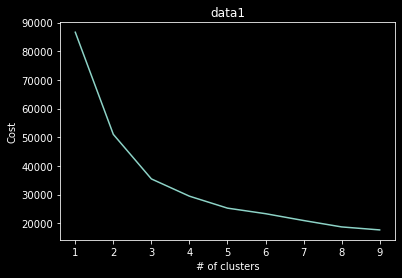

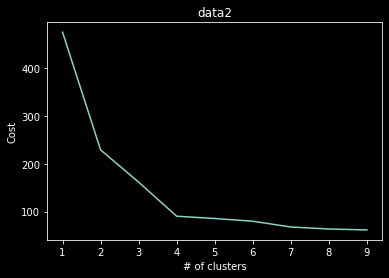

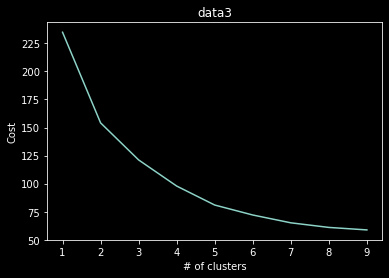

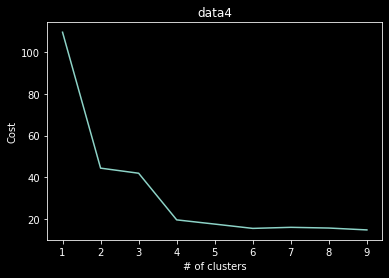

In [ ]:
cost_c_plot(samples1 , 'data1')

cost_c_plot(samples2 , 'data2')

cost_c_plot(samples3 , 'data3')

cost_c_plot(samples4 , 'data4')


<div dir=rtl>

  <p>
        در اینجا برای مجموعه داده اول نمودار هزینه برحسب مقدار 
        M
        را 
        plot
        می‌کنیم و همانطور که مشاهده می کنید مقدار این تابع به ازای
        M = 2 
        به کمینه خود می‌رسد.
        
        
  </p>
    
</div>
    

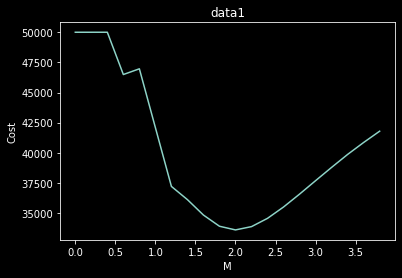

In [ ]:
cost_m_plot(samples1 , 'data1')

<div dir=rtl>
    <p>
        حال برای دیدن تاثیر M 
        به صورت دقیق تر به برسی آن به صورت زیر می پردازیم که هر خوشه را به یک رنگ نگاشت کرده
        و میانگین وزن دار از رنگ ها می گیریم.در این صورت می توانیم تعلق هر نقطه به هر خوشه 
        را 
        plot 
        کنیم.
        حال اگر مقدار
        M
        را افزایش دهیم، 
        مشاهدات نشان می‌دهد که مرز بین خوشه ها محو شده و تفکیک  نقاط از هم سخت
        می‌شود.
        همانطور که دیده می شود 
        crisp 
        کردن مجموعه فازی در صورت افزایش 
        M
        سخت‌تر شده است.
    </p>
    
</div>

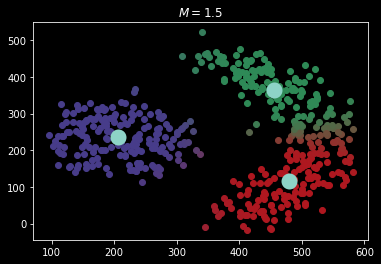

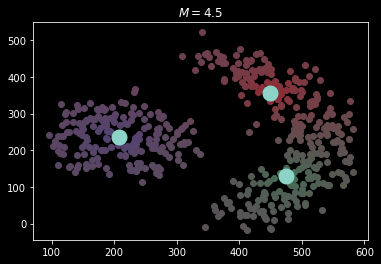

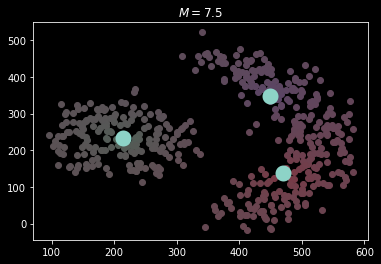

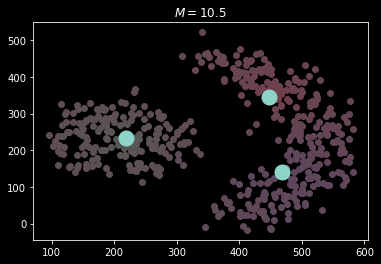

In [ ]:
centroids11 , U11  = make_cluster(samples1  , m=1.5 , cluster_num = 3 , num_iteration=20)
plot_colorgradient_2d(samples1 , U11 , centroids11 , colors , title = '$M = 1.5$')

centroids12 , U12  = make_cluster(samples1  , m=4.5 , cluster_num = 3 , num_iteration=20)
plot_colorgradient_2d(samples1 , U12 , centroids12 , colors , title = '$M = 4.5$')

centroids13 , U13  = make_cluster(samples1  , m=7.5 , cluster_num = 3 , num_iteration=20)
plot_colorgradient_2d(samples1 , U13 , centroids13 , colors , title = '$M = 7.5$')

centroids14 , U14  = make_cluster(samples1  , m=10.5 , cluster_num = 3 , num_iteration=20)
plot_colorgradient_2d(samples1 , U14 , centroids14 , colors , title = '$M = 10.5$')


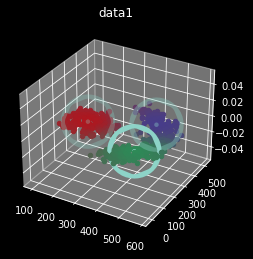

/home/alirezaak/anaconda3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:763: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/home/alirezaak/anaconda3/lib/python3.8/site-packages/mpl_toolkits/mplot3d/art3d.py:765: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


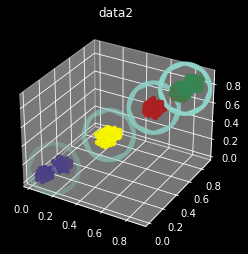

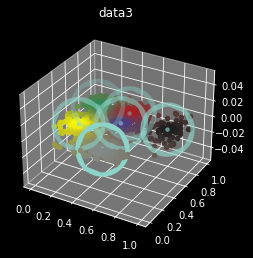

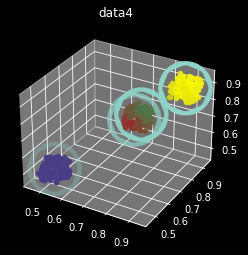

In [ ]:
centroids1 , U1  = make_cluster(samples1  , m=2 , cluster_num = 3 , num_iteration=20)
plot_colorgradient_3d(samples1 , U1 , centroids1 , colors , title = 'data1')

centroids2 , U2  = make_cluster(samples2  , m=2 , cluster_num = 4 , num_iteration=20)
plot_colorgradient_3d(samples2 , U2 , centroids2 , colors , title = 'data2')

centroids3 , U3  = make_cluster(samples3  , m=2 , cluster_num = 6 , num_iteration=20)
plot_colorgradient_3d(samples3 , U3 , centroids3 , colors , title = 'data3')

centroids4 , U4  = make_cluster(samples4  , m=2 , cluster_num = 4 , num_iteration=20)
plot_colorgradient_3d(samples4 , U4 , centroids4 , colors , title = 'data4')

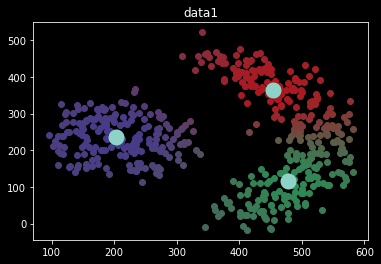

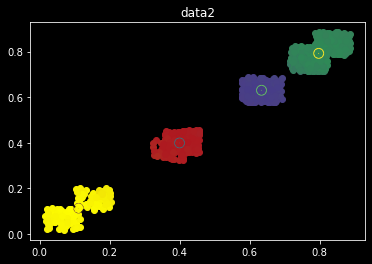

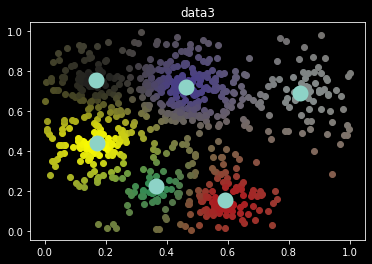

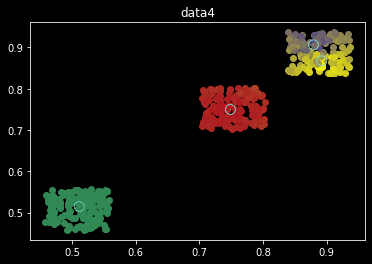

In [ ]:
centroids1 , U1  = make_cluster(samples1  , m=2 , cluster_num = 3 , num_iteration=20)
plot_colorgradient_2d(samples1 , U1 , centroids1 , colors , title = 'data1')

centroids2 , U2  = make_cluster(samples2  , m=2 , cluster_num = 4 , num_iteration=20)
plot_colorgradient_2d(samples2 , U2 , centroids2 , colors , title = 'data2')

centroids3 , U3  = make_cluster(samples3  , m=2 , cluster_num = 6 , num_iteration=20)
plot_colorgradient_2d(samples3 , U3 , centroids3 , colors , title = 'data3')

centroids4 , U4  = make_cluster(samples4  , m=2 , cluster_num = 4 , num_iteration=20)
plot_colorgradient_2d(samples4 , U4 , centroids4 , colors , title = 'data4')

<div dir=rtl>
    <p>
        در  انتها نیز داده هارا به صورت 
        crisp 
        در آورده و
        plot
        می کنیم.
        داده های بیشتر از دو یا سه بعد نیز تصویر شده‌اند.
    </p>

</div>

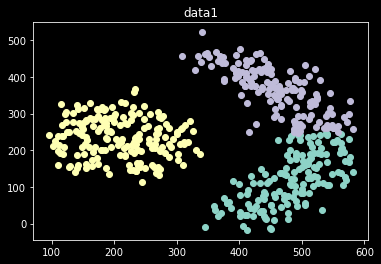

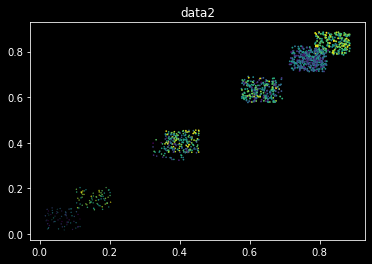

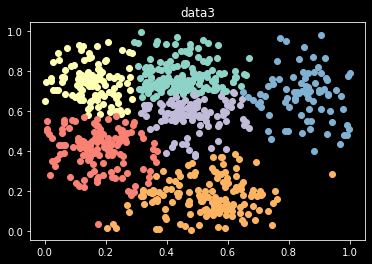

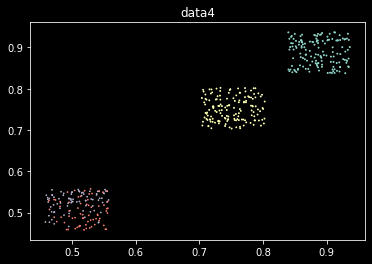

In [ ]:
centroids1 , U1  = make_cluster(samples1  , m=2 , cluster_num = 3 , num_iteration=20)
plot_crisp_2d(samples1 , U1 , centroids1 , title = 'data1')

centroids2 , U2  = make_cluster(samples2  , m=2 , cluster_num = 4 , num_iteration=20)
plot_crisp_2d(samples2 , U2 , centroids2  , title = 'data2')

centroids3 , U3  = make_cluster(samples3  , m=2 , cluster_num = 6 , num_iteration=20)
plot_crisp_2d(samples3 , U3 , centroids3  , title = 'data3')

centroids4 , U4  = make_cluster(samples4  , m=2 , cluster_num = 4 , num_iteration=20)
plot_crisp_2d(samples4 , U4 , centroids4  , title = 'data4')